<a href="https://colab.research.google.com/github/dileepyadavns/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Loading DataSet**

In [5]:
df=pd.read_csv("/content/customer_segmentation.csv", encoding='latin-1')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object

In [9]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [10]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [11]:
df['rank'] = df.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)


In [12]:
df_rec = df[df['rank']==1]

In [13]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,1
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,1
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,1
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,1


**Finding Recency values**



In [14]:
df_rec['recency'] = (df_rec['InvoiceDate'] - pd.to_datetime(min(df_rec['InvoiceDate']))).dt.days


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_rec['recency']

0           0
1           0
2           0
3           0
4           0
         ... 
541801    373
541802    373
541803    373
541804    373
541805    373
Name: recency, Length: 100811, dtype: int64

In [16]:
(df_rec['InvoiceDate'] - pd.to_datetime(min(df_rec['InvoiceDate']))).dt.days

0           0
1           0
2           0
3           0
4           0
         ... 
541801    373
541802    373
541803    373
541804    373
541805    373
Name: InvoiceDate, Length: 100811, dtype: int64

In [17]:
freq = df_rec.groupby('CustomerID')['InvoiceDate'].count()
df_freq = pd.DataFrame(freq).reset_index()

**Finding frequent values**

In [18]:
df_freq

,CustomerID,InvoiceDate
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,7
4370,18283.0,57


In [19]:
df_freq.columns=['CustomerID','Frequency']

In [20]:
df_freq

,CustomerID,Frequency
0,12346.0,1
1,12347.0,31
2,12348.0,17
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,7
4370,18283.0,57


In [21]:
rec_freq=df_freq.merge(df_rec, on='CustomerID')

In [22]:
rec_freq.head(5)

,CustomerID,Frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland,1,6


**Finding Monetary Values**

In [23]:
rec_freq['total']=rec_freq['Quantity']*rec_freq['UnitPrice']

In [24]:
rec_freq['total']

0         77183.6
1            25.2
2            17.0
3            39.0
4            23.4
           ...   
100805       59.4
100806       87.0
100807       19.8
100808       19.8
100809       25.2
Name: total, Length: 100810, dtype: float64

In [25]:
m=rec_freq.groupby("CustomerID")['total'].sum()

In [26]:
m

CustomerID
12346.0    77183.60
12347.0      711.79
12348.0      892.80
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      100.21
18283.0      108.45
18287.0      765.28
Name: total, Length: 4372, dtype: float64

In [27]:
m=pd.DataFrame(m).reset_index()

In [28]:
m

,CustomerID,total
0,12346.0,77183.60
1,12347.0,711.79
2,12348.0,892.80
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,100.21
4370,18283.0,108.45


In [29]:
m.columns=["CustomerID",'Monetary Value']

In [30]:
m

,CustomerID,Monetary Value
0,12346.0,77183.60
1,12347.0,711.79
2,12348.0,892.80
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,100.21
4370,18283.0,108.45


In [31]:
rec_freq=rec_freq.merge(m,on="CustomerID")

**Creating dataset with three meaningful variables**

In [32]:
rfm_df=rec_freq.loc[:,['CustomerID','Frequency','recency','Monetary Value']]

In [33]:
rfm_df

,CustomerID,Frequency,recency,Monetary Value
0,12346.0,1,48,77183.60
1,12347.0,31,6,711.79
2,12347.0,31,6,711.79
3,12347.0,31,6,711.79
4,12347.0,31,6,711.79
...,...,...,...,...
100805,18287.0,29,172,765.28
100806,18287.0,29,172,765.28
100807,18287.0,29,172,765.28
100808,18287.0,29,172,765.28


**Removing Outliers**

recency: 


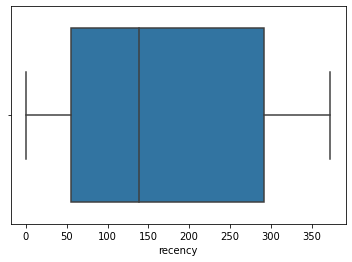

Frequency: 


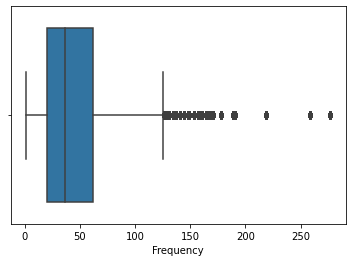

Monetary Value: 


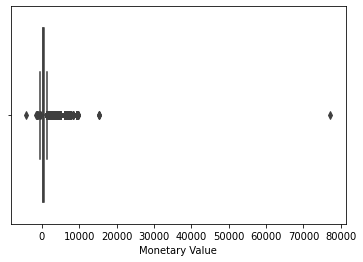

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','Frequency','Monetary Value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=rfm_df[str(i)])
    plt.show()